# Week 1

## Importing Libraries

In [86]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Loading Data into Pandas DataFrame

In [87]:
df=pd.read_csv('C:/Users/aryan/Downloads/city_day2.csv')
# Display the first 5 rows of the DataFrame to check the data
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.640,85.635,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.550,34.060,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,2.86,29.070,30.700,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.590,36.080,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,2.86,29.545,39.310,7.01,18.89,2.78,NaN,NaN


# Preprocessing 

In [88]:
#filtering for one city
df = df[df['City'] == "Amaravati"].copy()
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2122,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.760,85.635,0.17,5.92,0.10,NaN,NaN
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.240,85.635,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.960,85.635,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,29.545,85.635,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.000,85.635,0.17,5.02,0.07,188.0,Moderate


In [89]:
# Removing city column as we are working only on amaravati city 
df.drop(columns=['City'], inplace=True)
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2122,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.760,85.635,0.17,5.92,0.10,NaN,NaN
2123,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.240,85.635,0.20,6.50,0.06,184.0,Moderate
2124,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.960,85.635,0.22,7.95,0.08,197.0,Moderate
2125,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,29.545,85.635,0.29,7.63,0.12,198.0,Moderate
2126,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.000,85.635,0.17,5.02,0.07,188.0,Moderate


In [90]:
#Replacing AQI_Bucket values to breathable or not for user friendly interface
df.replace(['Good', 'Satisfactory','Moderate'], 'Breathable', inplace=True)
df.replace(['Poor', 'Very Poor','Severe'], 'Not Breathable', inplace=True)
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2122,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.760,85.635,0.17,5.92,0.10,NaN,NaN
2123,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.240,85.635,0.20,6.50,0.06,184.0,Breathable
2124,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.960,85.635,0.22,7.95,0.08,197.0,Breathable
2125,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,29.545,85.635,0.29,7.63,0.12,198.0,Breathable
2126,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.000,85.635,0.17,5.02,0.07,188.0,Breathable


### Calculate Null Values

In [91]:
df.isnull().sum()

Date            0
PM2.5          59
PM10           55
NO             55
NO2            55
NOx            55
NH3            55
CO             97
SO2            65
O3             55
Benzene        75
Toluene        75
Xylene        269
AQI           110
AQI_Bucket    110
dtype: int64

### Removing Null Values

In [92]:
# There may be complete empty rows except date we will now drop them as it makes no changes in efficient model training
df.dropna(subset=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene','AQI','AQI_Bucket'], how='all', inplace=True)
df.isnull().sum()

Date            0
PM2.5           5
PM10            1
NO              1
NO2             1
NOx             1
NH3             1
CO             43
SO2            11
O3              1
Benzene        21
Toluene        21
Xylene        215
AQI            56
AQI_Bucket     56
dtype: int64

In [93]:
# As Xylene has more number of missing values and is not that required for our project we delete this whole column to reduce errors
df.drop(columns=['Xylene'], inplace=True)
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
2122,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.760,85.635,0.17,5.92,NaN,NaN
2123,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.240,85.635,0.20,6.50,184.0,Breathable
2124,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.960,85.635,0.22,7.95,197.0,Breathable
2125,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,29.545,85.635,0.29,7.63,198.0,Breathable
2126,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.000,85.635,0.17,5.02,188.0,Breathable


### Filling Missing Values

In [94]:
# using median imputation method for columns having veryless NULL values
median_PM2_5= df['PM2.5'].median()
median_PM10= df['PM10'].median()
median_NO=df['NO'].median()
median_NO2=df['NO2'].median()       
median_NOx=df['NOx'].median()
median_NH3=df['NH3'].median()
median_O3=df['O3'].median()  

df['PM2.5'] = df['PM2.5'].fillna(median_PM2_5)
df['PM10'] = df['PM10'].fillna(median_PM10)
df['NO'] = df['NO'].fillna(median_NO)
df['NO2'] = df['NO2'].fillna(median_NO2)
df['NOx'] = df['NOx'].fillna(median_NOx)
df['NH3'] = df['NH3'].fillna(median_NH3)
df['O3'] = df['O3'].fillna(median_O3)
#Now check for NULL values again
df.isnull().sum()

Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO            43
SO2           11
O3             0
Benzene       21
Toluene       21
AQI           56
AQI_Bucket    56
dtype: int64

In [95]:
# Now we use KNN imputer to impute NULL values other than AQI_Bucket as we will fill it later
imputer = KNNImputer(n_neighbors=3)

df[['CO', 'SO2', 'Benzene', 'Toluene','AQI']] = imputer.fit_transform(df[['CO', 'SO2', 'Benzene', 'Toluene','AQI']])
df.isnull().sum() #checking if we imputed null values

Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
AQI            0
AQI_Bucket    56
dtype: int64

In [96]:
# Now lets fill AQI_Bucket with the help of AQI
conditions = [
    (df['AQI'] >= 0) & (df['AQI'] <= 50),
    (df['AQI'] >= 51) & (df['AQI'] <= 100),
    (df['AQI'] >= 101) & (df['AQI'] <= 200),
    (df['AQI'] >= 201) & (df['AQI'] <= 300),
    (df['AQI'] >= 301) & (df['AQI'] <= 400),
    (df['AQI'] >= 401)
]

# 3. Define the corresponding choices (AQI bucket names)
choices = [
    'Breathable',
    'Breathable',
    'Breathable',
    'Not Breathable',
    'Not Breathable',
    'Not Breathable'
]

# 4. Use np.select to create the new 'AQI_Bucket' column
df['AQI_Bucket'] = np.select(conditions, choices, default='Unknown')
df.isnull().sum()

Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

### Data Cleaning

In [97]:
### Check for duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Date, PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, AQI, AQI_Bucket]
Index: []


In [98]:
#check if do we need to convert any datatypes
df.dtypes

Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
AQI           float64
AQI_Bucket     object
dtype: object

### Data Transformation

#### Categorial Encoding by using label encoder

In [99]:
#encode aqi bucket column as the model trains only with numerical values
encoder = LabelEncoder()
df["AQI_Bucket_encoded"] = encoder.fit_transform(df["AQI_Bucket"])
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,AQI_Bucket_encoded
2122,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.760,85.635,0.17,5.92,165.0,Breathable,0
2123,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.240,85.635,0.20,6.50,184.0,Breathable,0
2124,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.960,85.635,0.22,7.95,197.0,Breathable,0
2125,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,29.545,85.635,0.29,7.63,198.0,Breathable,0
2126,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.000,85.635,0.17,5.02,188.0,Breathable,0


In [100]:
# convert date column to datetime so that we can retrieve year month and day seperately later which will be int datatype
df['Date'] = pd.to_datetime(df['Date'])

In [101]:
# seperating year month and day so that it will be in int format which is correct format in model training
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
print(df.head())

           Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO     SO2  \
2122 2017-11-24  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.760   
2123 2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.240   
2124 2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.960   
2125 2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11  29.545   
2126 2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.000   

          O3  Benzene  Toluene    AQI  AQI_Bucket  AQI_Bucket_encoded  Year  \
2122  85.635     0.17     5.92  165.0  Breathable                   0  2017   
2123  85.635     0.20     6.50  184.0  Breathable                   0  2017   
2124  85.635     0.22     7.95  197.0  Breathable                   0  2017   
2125  85.635     0.29     7.63  198.0  Breathable                   0  2017   
2126  85.635     0.17     5.02  188.0  Breathable                   0  2017   

      Month  Day  
2122     11   24  
2123     11   25  
2124     11   26 

In [102]:
#drop date and aqi_bucket columns as they are no longer needed
df=df.drop(columns=['Date','AQI_Bucket'])

In [103]:
print(df.head())
print(df.dtypes)

      PM2.5    PM10    NO    NO2    NOx    NH3    CO     SO2      O3  Benzene  \
2122  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.760  85.635     0.17   
2123  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.240  85.635     0.20   
2124  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.960  85.635     0.22   
2125  88.76  135.32  6.60  30.85  21.77  12.91  0.11  29.545  85.635     0.29   
2126  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.000  85.635     0.17   

      Toluene    AQI  AQI_Bucket_encoded  Year  Month  Day  
2122     5.92  165.0                   0  2017     11   24  
2123     6.50  184.0                   0  2017     11   25  
2124     7.95  197.0                   0  2017     11   26  
2125     7.63  198.0                   0  2017     11   27  
2126     5.02  188.0                   0  2017     11   28  
PM2.5                 float64
PM10                  float64
NO                    float64
NO2                   float64
NOx                   float

# Week 2

In [104]:
#defining features and target variable
x = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene']]
y = df['AQI']

In [105]:
# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [106]:
#defining model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [107]:
#training model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
# Use the trained model to generate predictions on the test dataset
y_pred = model.predict(x_test)

In [109]:
# Evaluate the model's performance using common regression metrics:
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 12.019074074074075
Root Mean Squared Error: 17.401954608535526
R² Score: 0.887339621273162


In [110]:
#comparing actual and predicted values
df2 = pd.DataFrame({"ypredicted":y_pred,"y_actual":y_test})
df2

,ypredicted,y_actual
2460,117.210000,133.0
2814,49.936667,51.0
2455,148.700000,149.0
3023,41.776667,41.0
2161,136.046667,132.0
...,...,...
2953,67.470000,66.0
2147,253.920000,228.0
2206,121.426667,117.0
2132,186.420000,168.0


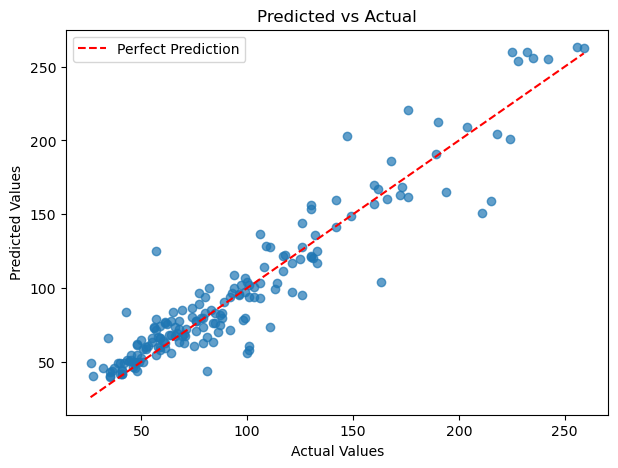

In [111]:
#visualizing actual and predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(df2['y_actual'], df2['ypredicted'], alpha=0.7)
plt.plot([df2['y_actual'].min(), df2['y_actual'].max()],
         [df2['y_actual'].min(), df2['y_actual'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

In [112]:
#saving the model
joblib.dump(model, "aqi_model.pkl")

['aqi_model.pkl']